# Исследование регрессии

подберем лучшую модель для предсказания температуры от часа года

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Получение данных

In [4]:
data = pd.read_csv('/content/sample_data/energy_2.csv')
print(data.head())

             timestamp  site_id  building_id  meter  meter_reading  \
0  2016-01-01 00:00:00        0            0      0            0.0   
1  2016-01-01 01:00:00        0            0      0            0.0   
2  2016-01-01 02:00:00        0            0      0            0.0   
3  2016-01-01 03:00:00        0            0      0            0.0   
4  2016-01-01 04:00:00        0            0      0            0.0   

  primary_use  square_feet  year_built  floor_count  air_temperature  \
0   Education         7432      2008.0          NaN             25.0   
1   Education         7432      2008.0          NaN             24.4   
2   Education         7432      2008.0          NaN             22.8   
3   Education         7432      2008.0          NaN             21.1   
4   Education         7432      2008.0          NaN             20.0   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             6.0             20.0                0.0              10

In [7]:
x = np.array(data.index).reshape(-1, 1)
y = data['air_temperature']

## Модель линейной регрессии

In [5]:
def calculate_bic (y, y_pred, power):
  return len(y) * np.log(len(y) * mean_squared_error(y, y_pred)**2) + power * np.log(len(y))
def calculate_aic (y, y_pred, power):
  return len(y) * np.log(len(y) * mean_squared_error(y, y_pred)**2) + 2 * power

In [10]:
bics = [0]
aics = [0]
model = LinearRegression().fit(x, y)
print ('Линейная регрессия R2: {0:.5}'.format(model.score(x, y)))
bics.append(calculate_bic(y, model.predict(x), 1))
print ('BIC: {0:.5}'.format(bics[1]))
aics.append(calculate_aic(y, model.predict(x), 1))
print ('AIC: {0:.5}'.format(aics[1]))

Линейная регрессия R2: 0.080983
BIC: 1.4154e+05
AIC: 1.4153e+05


## Степенная регрессия

In [12]:
x_ = pd.DataFrame({'x1': data.index})
for i in range (10):
  x_['x' + str(i + 2)] = np.multiply(x_['x' + str(i + 1)], data.index)
  model_ = LinearRegression().fit(x_, y)
  aics.append(calculate_aic(y, model_.predict(x_), i + 2))
  bics.append(calculate_bic(y, model_.predict(x_), i + 2))
  print('Регрессия', (i+2), 'степени R2: {0:.5},'.format(model_.score(x_, y)), 
        'BIC: {0:.5},'.format(bics[i+2]), 
        'AIC: {0:.5},'.format(aics[i+2]))

Регрессия 2 степени R2: 0.48205, BIC: 1.3148e+05, AIC: 1.3146e+05,
Регрессия 3 степени R2: 0.48588, BIC: 1.3136e+05, AIC: 1.3133e+05,
Регрессия 4 степени R2: 0.50995, BIC: 1.3052e+05, AIC: 1.3049e+05,
Регрессия 5 степени R2: 0.5098, BIC: 1.3054e+05, AIC: 1.305e+05,
Регрессия 6 степени R2: 0.50982, BIC: 1.3054e+05, AIC: 1.305e+05,
Регрессия 7 степени R2: 0.50983, BIC: 1.3055e+05, AIC: 1.305e+05,
Регрессия 8 степени R2: 0.50989, BIC: 1.3056e+05, AIC: 1.305e+05,
Регрессия 9 степени R2: 0.50996, BIC: 1.3057e+05, AIC: 1.305e+05,
Регрессия 10 степени R2: 0.50996, BIC: 1.3058e+05, AIC: 1.3051e+05,
Регрессия 11 степени R2: 0.50998, BIC: 1.3058e+05, AIC: 1.3051e+05,


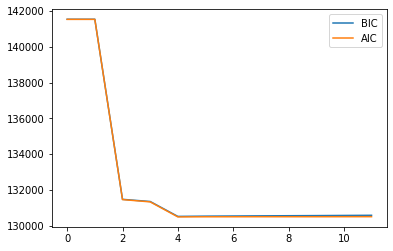

In [13]:
aics[0] = max(aics)
bics[0] = max(bics)
plt.plot(bics)
plt.plot(aics)
plt.legend(['BIC', 'AIC'])
plt.show()